<a href="https://colab.research.google.com/github/supps27/System-Resource-Logger/blob/main/psutility_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install psutil

In [26]:

import time
import psutil
import json
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt



In [27]:
#log data

while True:
    def cpu_log():
        """
        featching 3 system stasts
        cpu% , virtual memory , disc usage
        """
        cpu_per=psutil.cpu_percent(interval=1)
        virt_mem=psutil.virtual_memory().percent
        disc_usage=psutil.disk_usage('/').percent

        # print(cpu_per)
        # print(virt_mem)
        # print(disc_usage)
        return cpu_per,virt_mem,disc_usage

    cpu_log()



    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

    log_data={
    "timestamp":timestamp,
    "Cpu percentage":cpu_log()[0],
    "memory percentage":cpu_log()[1],
    "disc usage":cpu_log()[2]
    }



    js=json.dumps(log_data)
    fd=open("Cpu log data.jsonl","a")
    fd.write(js+"\n")
    fd.close()

    print(log_data)
    time.sleep(5)



{'timestamp': '2025-10-31 11:03:08', 'Cpu percentage': 42.4, 'memory percentage': 10.2, 'disc usage': 36.3}
{'timestamp': '2025-10-31 11:03:17', 'Cpu percentage': 2.0, 'memory percentage': 10.2, 'disc usage': 36.3}
{'timestamp': '2025-10-31 11:03:26', 'Cpu percentage': 2.0, 'memory percentage': 10.3, 'disc usage': 36.3}
{'timestamp': '2025-10-31 11:03:35', 'Cpu percentage': 2.5, 'memory percentage': 10.1, 'disc usage': 36.3}
{'timestamp': '2025-10-31 11:03:44', 'Cpu percentage': 46.7, 'memory percentage': 10.3, 'disc usage': 36.3}
{'timestamp': '2025-10-31 11:03:53', 'Cpu percentage': 3.0, 'memory percentage': 10.3, 'disc usage': 36.3}
{'timestamp': '2025-10-31 11:04:02', 'Cpu percentage': 4.0, 'memory percentage': 10.3, 'disc usage': 36.3}
{'timestamp': '2025-10-31 11:04:11', 'Cpu percentage': 2.5, 'memory percentage': 10.4, 'disc usage': 36.3}
{'timestamp': '2025-10-31 11:04:20', 'Cpu percentage': 2.0, 'memory percentage': 10.4, 'disc usage': 36.3}
{'timestamp': '2025-10-31 11:04:29'

KeyboardInterrupt: 

Here i tried to append dict with key and value but it is not possible to do it because it should have unique key but here key is same so updating dict like that is not possible

In [28]:
import numpy as np
"""
for cpu data we will extract
it from json file convert it into numpy array
"""
fd=open("Cpu log data.jsonl","r")
js=fd.readlines()
fd.close()




cu_dt=np.array([json.loads(l)["Cpu percentage"] for l in js])
mem_dt=np.array([json.loads(l)["memory percentage"] for l in js])
di_usg=np.array([json.loads(l)["disc usage"] for l in js ])
"""
working , json.loads(l) converts json object into dict and
accessing the value through key for l in js
"""
print("Avrage cpu percentage:",cu_dt.mean(),"\n","Max and Min cpu percentage:",np.max(cu_dt),np.min(cu_dt))
print("Avrage memory usage  :",np.mean(mem_dt),"\n","Max and Min memory usage:",np.max(mem_dt),np.min(mem_dt))
print(np.mean(di_usg))

Avrage cpu percentage: 11.548387096774194 
 Max and Min cpu percentage: 56.0 2.0
Avrage memory usage  : 10.225806451612904 
 Max and Min memory usage: 10.6 10.0
36.29999999999999


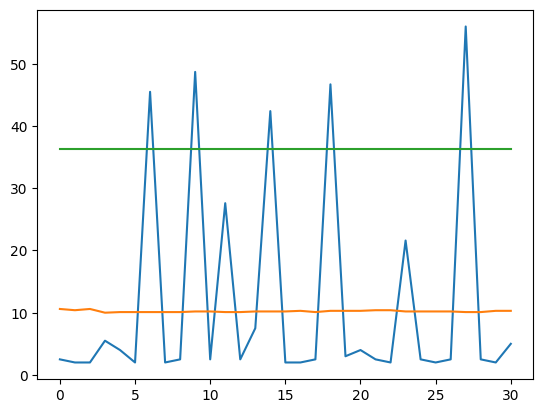

In [29]:
import matplotlib.pyplot as plt
plt.plot(cu_dt)
plt.plot(mem_dt)
plt.plot(di_usg)

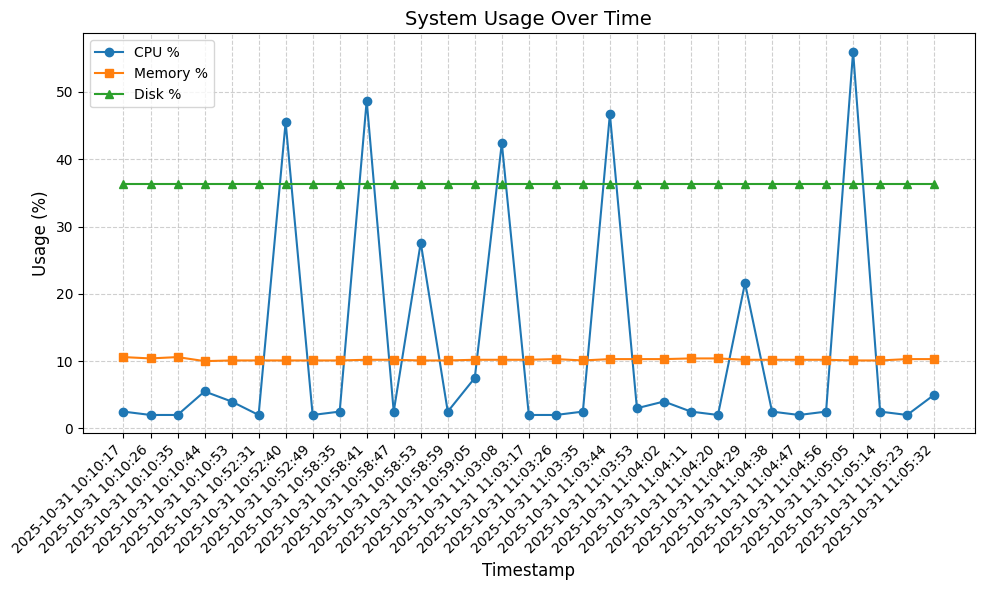

In [30]:
import json
import numpy as np
import matplotlib.pyplot as plt

# ---- Read JSONL file ----
with open("Cpu log data.jsonl", "r") as fd:
    js = fd.readlines()

# ---- Extract data from each JSON object ----
timestamps = [json.loads(l)["timestamp"] for l in js]
cu_dt = np.array([json.loads(l)["Cpu percentage"] for l in js])
mem_dt = np.array([json.loads(l)["memory percentage"] for l in js])
di_usg = np.array([json.loads(l)["disc usage"] for l in js])

# ---- Plot ----
plt.figure(figsize=(10, 6))

plt.plot(timestamps, cu_dt, label="CPU %", marker='o')
plt.plot(timestamps, mem_dt, label="Memory %", marker='s')
plt.plot(timestamps, di_usg, label="Disk %", marker='^')

plt.title("System Usage Over Time", fontsize=14)
plt.xlabel("Timestamp", fontsize=12)
plt.ylabel("Usage (%)", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Make timestamps readable
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
